### Importing Libraries 

In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Defining path

path = r'/Users/tanu/Desktop/Instacart Basket Analysis/02 Data'

In [7]:
# Importing Data frame

df_merge = pd.read_pickle(os.path.join(path,'Prepared data','ords_prods_cstmr_merged.pkl'))

In [9]:
df_merge.shape

(32404859, 32)

In [11]:
df_merge.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,days_btwn_orders,order_frequency,First Name,Last Name,Gender,State,Age,No. of Dependants,Marital status,income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


### Step 3. Creating Histogram of "order_hour_of_day" column


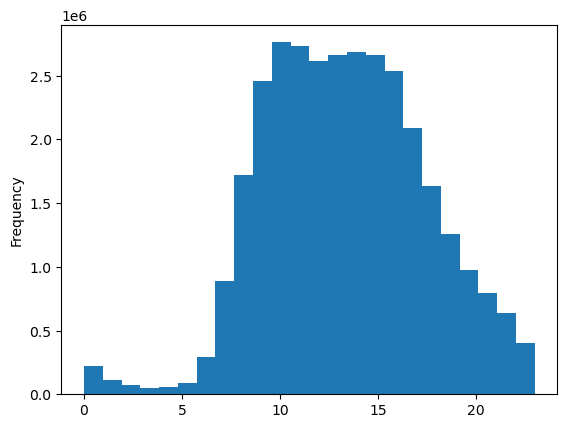

In [41]:
hist = df_merge['order_hour_of_day'].plot.hist(bins = 24)

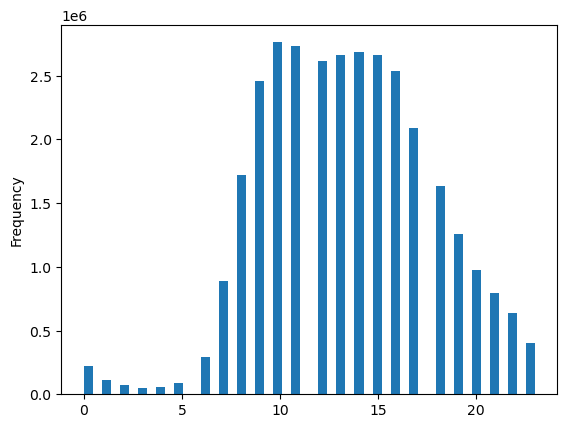

In [103]:
hist_1 = df_merge['order_hour_of_day'].plot.hist(bins = 50)

#### Observation: 9 am to 5 pm is the busiest time of the day

### Step 4. Create Bar chart from "loyalty_flag" column 

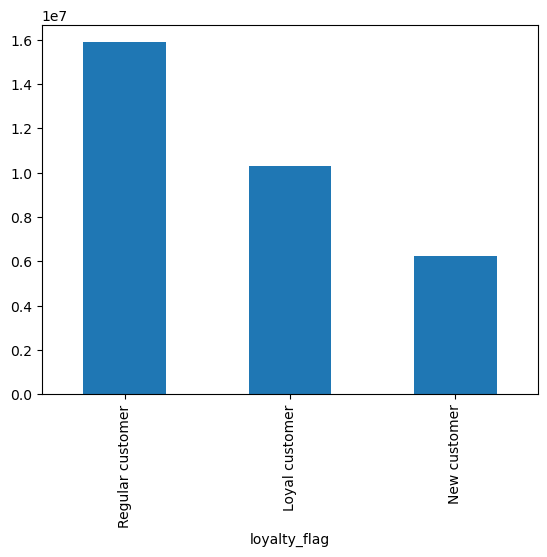

In [45]:
bar = df_merge['loyalty_flag'].value_counts().plot.bar()

In [25]:
df_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

#### Observation : Most of instacart customers are regular(almost 50%) followed by loyal customers ( close to 32%) and then new customers( 19 % of total).


### Step 5.Checking difference in spendhing by hour

#### Creating sample data


In [59]:
# spliting the data in 70/30 ratio
# Generating seed
np.random.seed(4)

In [61]:
dev = np.random.rand(len(df_merge)) <= 0.7

In [65]:
# Spliting into two samples

big = df_merge[dev]
small = df_merge[~dev]

In [67]:
len(df_merge)

32404859

In [69]:
len(big)+len(small)

32404859

In [71]:
# calling only required columns

df_sample = small[['order_hour_of_day','prices']]

In [73]:
df_sample.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


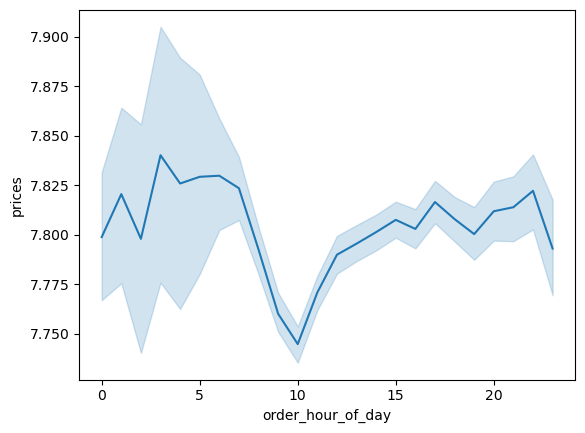

In [75]:
# Creating the line graph

line = sns.lineplot(data = df_sample, x= 'order_hour_of_day',y= 'prices')

#### Observation : Expenditure is least at 10 am.


### Step 6. Connection between age and family situation

In [79]:
sample_1 = small[['Age','No. of Dependants']]

In [81]:
sample_1.head()

,Age,No. of Dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


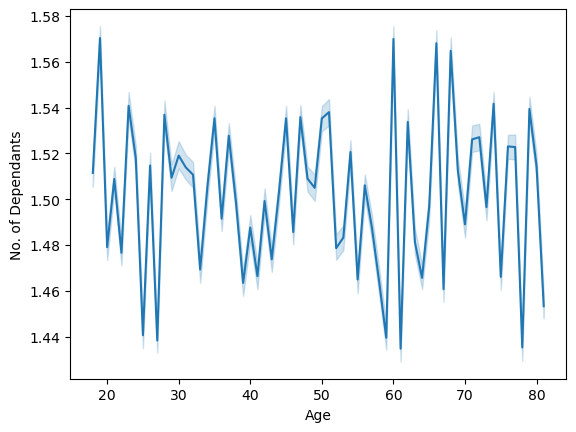

In [87]:
line_1 = sns.lineplot(data = sample_1, x= 'Age',y= 'No. of Dependants')

#### Observation: Age has no relation to family size or number of dependants

### Step 7 Create a scatterplot between age and income

In [93]:
sample_2 = small[['Age','income']]

In [95]:
sample_2.head()

,Age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


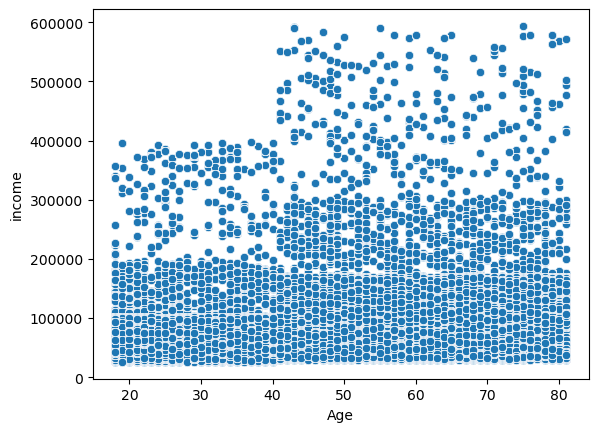

In [98]:
scatterplot_1 = sns.scatterplot(x='Age',y='income', data = sample_2)

#### Observation : Higher age group (40+ ) has higher spending limit(400k +)

### Step 8. Export/ save work


In [105]:
path_1 = path = r'/Users/tanu/Desktop/Instacart Basket Analysis'

In [115]:
hist.figure.savefig(os.path.join(path,'04 Analysis','order hour of day.png'))

In [117]:
hist_1.figure.savefig(os.path.join(path,'04 Analysis','order hour of day 2.png'))

In [119]:
bar.figure.savefig(os.path.join(path,'04 Analysis','loyalty flag.png'))

In [121]:
line.figure.savefig(os.path.join(path,'04 Analysis','order hour & prices.png'))

In [123]:
line_1.figure.savefig(os.path.join(path,'04 Analysis','age and no og dependants.png'))

In [125]:
scatterplot_1.figure.savefig(os.path.join(path,'04 Analysis','Age and income.png'))